In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
X = dataset.drop(dataset[['target']], axis =1)
y = dataset['target']

In [ ]:
X.shape , y.shape , dataset.shape

((303, 30), (303,), (303, 31))

In [ ]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)
logr = LogisticRegression()
logr.fit(X_train,y_train)


LogisticRegression()

In [ ]:
pred = logr.predict(X_test)
accuracy_score(pred,y_test)

0.8852459016393442

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(pred,y_test))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.94      0.86      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
test_acc = []
for i in range(1,1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)
  logr = LogisticRegression()
  logr.fit(X_train,y_train)
  pred = logr.predict(X_test)
  test_acc.append(accuracy_score(pred,y_test))

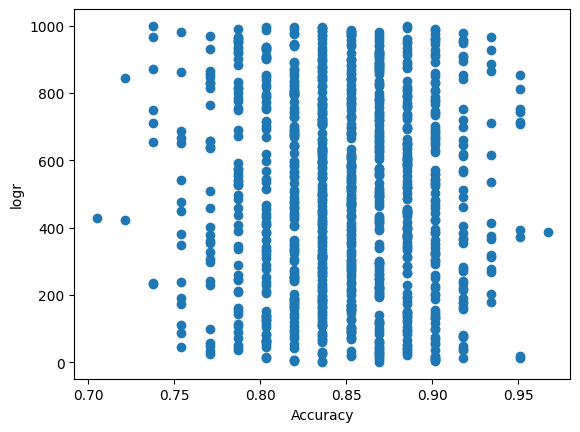

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(test_acc, range(1,1000))
plt.xlabel("Accuracy")
plt.ylabel("logr")
plt.show()

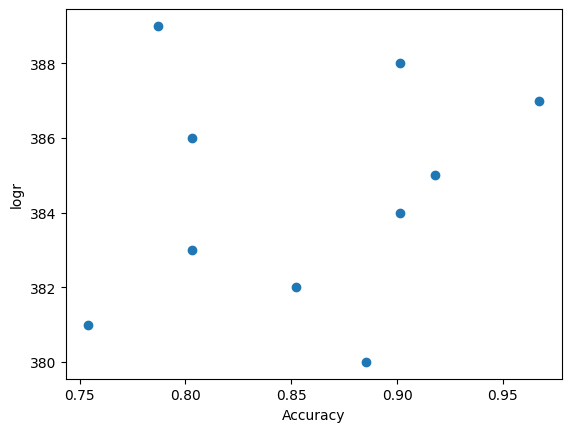

In [ ]:
plt.scatter(test_acc[379:389], range(380,390))
plt.xlabel("Accuracy")
plt.ylabel("logr")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=387)
logr = LogisticRegression()
logr.fit(X_train,y_train)
logr.fit(X_train,y_train)
pred = logr.predict(X_test)
accuracy_score(pred,y_test)

0.9672131147540983

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    knn_scores.append(accuracy_score(pred,y_test))

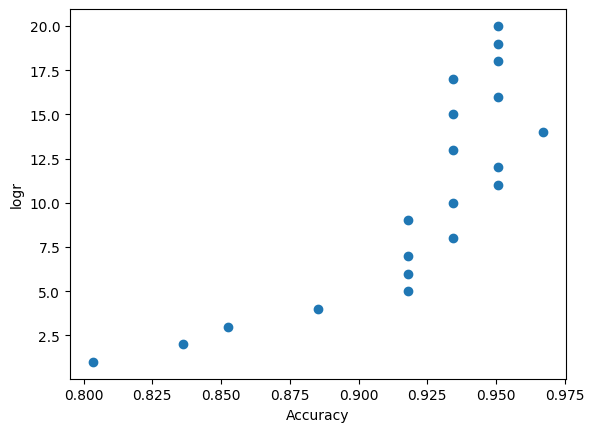

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(knn_scores, range(1,21))
plt.xlabel("Accuracy")
plt.ylabel("logr")
plt.show()

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 14)
knc.fit(X_train,y_train)
pred = knc.predict(X_test)
accuracy_score(pred,y_test)

0.9672131147540983

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred = rfc.predict(X_test)
accuracy_score(pred,y_test)

0.9016393442622951

In [ ]:
test_acc = []
for i in range(1,1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)
  rfc = RandomForestClassifier()
  rfc.fit(X_train,y_train)
  pred = rfc.predict(X_test)
  test_acc.append(accuracy_score(pred,y_test))

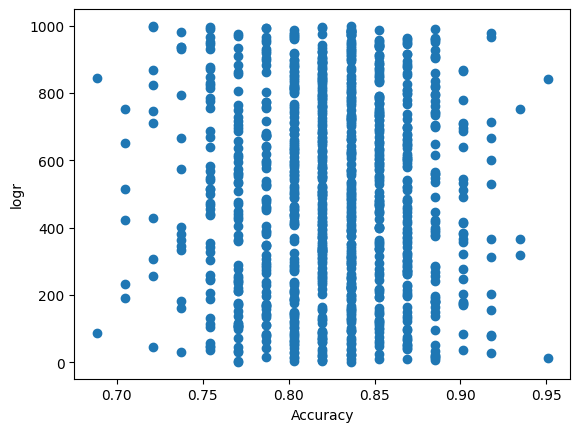

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(test_acc, range(1,1000))
plt.xlabel("Accuracy")
plt.ylabel("logr")
plt.show()

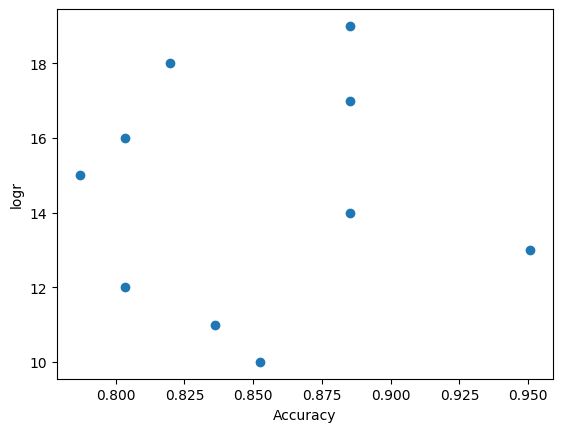

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(test_acc[9:19], range(10,20))
plt.xlabel("Accuracy")
plt.ylabel("logr")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
accuracy_score(pred,y_test)

0.9508196721311475